In [151]:
import numpy as np
import sklearn
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.datasets import cifar10
%matplotlib inline

In [266]:
def encode_lable(y, num_classes):
    y_gt = np.zeros((len(y), num_classes))
    for i in range(0, len(y)):
        y_gt[i, y[i]] = 1
    return y_gt

In [276]:
(dx_train, dy_train), (x_test, y_test) = cifar10.load_data()

In [277]:
print('x_train shape:', dx_train.shape)
print(dx_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [278]:
dy_train = encode_lable(dy_train, 10)
y_test = encode_lable(y_test, 10)

In [279]:
dx_train = np.asarray([list(x.flat) for x in dx_train])
x_test = np.asarray([list(x.flat) for x in x_test])

In [280]:
p = np.random.permutation(dx_train.shape[0])
x_train = dx_train[p[0:int(len(dx_train)*0.8)], :]
y_train = dy_train[p[0:int(len(dx_train)*0.8)]]
x_val = dx_train[p[int(len(dx_train)*0.8):], :]
y_val = dy_train[p[int(len(dx_train)*0.8):]]
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (40000, 3072)
y_train shape: (40000, 10)
x_val shape: (10000, 3072)
y_val shape: (10000, 10)
x_test shape: (10000, 3072)
y_test shape: (10000, 10)


In [281]:
x_train = (x_train - np.mean(x_train, axis = 0)) / np.var(x_train, axis = 0)
x_val = (x_val - np.mean(x_val, axis = 0)) / np.var(x_val, axis = 0)
x_test = (x_test - np.mean(x_test, axis = 0)) / np.var(x_test, axis = 0)

In [286]:
model = Sequential()
#model.add(Dense(10, activation='sigmoid', input_dim=3072))
model.add(Dense(64, activation='sigmoid', input_dim=3072))
model.add(Dense(10, activation = 'sigmoid'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [289]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=600, batch_size=10000)

Train on 40000 samples, validate on 10000 samples
Epoch 1/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.9991 - acc: 0.3201 - val_loss: 1.9849 - val_acc: 0.3323
Epoch 2/600
40000/40000 [==============================] - 1s 32us/step - loss: 1.9886 - acc: 0.3265 - val_loss: 1.9742 - val_acc: 0.3358
Epoch 3/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.9786 - acc: 0.3285 - val_loss: 1.9641 - val_acc: 0.3408
Epoch 4/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.9689 - acc: 0.3304 - val_loss: 1.9544 - val_acc: 0.3425
Epoch 5/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.9596 - acc: 0.3349 - val_loss: 1.9446 - val_acc: 0.3435
Epoch 6/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.9507 - acc: 0.3368 - val_loss: 1.9357 - val_acc: 0.3469
Epoch 7/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.9422 - acc: 0.3383 - val_loss: 1.9272 - 

Epoch 118/600
40000/40000 [==============================] - 1s 32us/step - loss: 1.6652 - acc: 0.4259 - val_loss: 1.6688 - val_acc: 0.4249
Epoch 119/600
40000/40000 [==============================] - 1s 32us/step - loss: 1.6640 - acc: 0.4270 - val_loss: 1.6675 - val_acc: 0.4244
Epoch 120/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.6631 - acc: 0.4268 - val_loss: 1.6672 - val_acc: 0.4254
Epoch 121/600
40000/40000 [==============================] - 1s 30us/step - loss: 1.6619 - acc: 0.4272 - val_loss: 1.6658 - val_acc: 0.4252
Epoch 122/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.6608 - acc: 0.4277 - val_loss: 1.6649 - val_acc: 0.4260
Epoch 123/600
40000/40000 [==============================] - 1s 32us/step - loss: 1.6597 - acc: 0.4285 - val_loss: 1.6640 - val_acc: 0.4255
Epoch 124/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.6590 - acc: 0.4288 - val_loss: 1.6635 - val_acc: 0.4269
Epoch 125/600
40000/

40000/40000 [==============================] - 1s 32us/step - loss: 1.5553 - acc: 0.4651 - val_loss: 1.5861 - val_acc: 0.4527
Epoch 235/600
40000/40000 [==============================] - 2s 39us/step - loss: 1.5544 - acc: 0.4653 - val_loss: 1.5851 - val_acc: 0.4541
Epoch 236/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.5534 - acc: 0.4655 - val_loss: 1.5843 - val_acc: 0.4558
Epoch 237/600
40000/40000 [==============================] - 1s 33us/step - loss: 1.5526 - acc: 0.4663 - val_loss: 1.5837 - val_acc: 0.4544
Epoch 238/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.5517 - acc: 0.4655 - val_loss: 1.5834 - val_acc: 0.4543
Epoch 239/600
40000/40000 [==============================] - 1s 30us/step - loss: 1.5511 - acc: 0.4667 - val_loss: 1.5831 - val_acc: 0.4541
Epoch 240/600
40000/40000 [==============================] - 1s 30us/step - loss: 1.5502 - acc: 0.4665 - val_loss: 1.5823 - val_acc: 0.4545
Epoch 241/600
40000/40000 [=======

40000/40000 [==============================] - 1s 37us/step - loss: 1.4632 - acc: 0.4966 - val_loss: 1.5232 - val_acc: 0.4733
Epoch 351/600
40000/40000 [==============================] - 1s 32us/step - loss: 1.4627 - acc: 0.4952 - val_loss: 1.5234 - val_acc: 0.4753
Epoch 352/600
40000/40000 [==============================] - 1s 34us/step - loss: 1.4620 - acc: 0.4960 - val_loss: 1.5222 - val_acc: 0.4744
Epoch 353/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.4614 - acc: 0.4970 - val_loss: 1.5221 - val_acc: 0.4762
Epoch 354/600
40000/40000 [==============================] - 1s 32us/step - loss: 1.4604 - acc: 0.4972 - val_loss: 1.5221 - val_acc: 0.4756
Epoch 355/600
40000/40000 [==============================] - 1s 32us/step - loss: 1.4596 - acc: 0.4976 - val_loss: 1.5212 - val_acc: 0.4747
Epoch 356/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.4590 - acc: 0.4970 - val_loss: 1.5205 - val_acc: 0.4738
Epoch 357/600
40000/40000 [=======

40000/40000 [==============================] - 1s 31us/step - loss: 1.3876 - acc: 0.5200 - val_loss: 1.4779 - val_acc: 0.4921
Epoch 467/600
40000/40000 [==============================] - 1s 30us/step - loss: 1.3870 - acc: 0.5204 - val_loss: 1.4779 - val_acc: 0.4905
Epoch 468/600
40000/40000 [==============================] - 1s 30us/step - loss: 1.3869 - acc: 0.5205 - val_loss: 1.4775 - val_acc: 0.4919
Epoch 469/600
40000/40000 [==============================] - 1s 30us/step - loss: 1.3861 - acc: 0.5208 - val_loss: 1.4772 - val_acc: 0.4926
Epoch 470/600
40000/40000 [==============================] - 1s 30us/step - loss: 1.3853 - acc: 0.5202 - val_loss: 1.4773 - val_acc: 0.4894
Epoch 471/600
40000/40000 [==============================] - 1s 30us/step - loss: 1.3848 - acc: 0.5204 - val_loss: 1.4761 - val_acc: 0.4929
Epoch 472/600
40000/40000 [==============================] - 1s 30us/step - loss: 1.3842 - acc: 0.5215 - val_loss: 1.4766 - val_acc: 0.4912
Epoch 473/600
40000/40000 [=======

40000/40000 [==============================] - 1s 30us/step - loss: 1.3270 - acc: 0.5395 - val_loss: 1.4480 - val_acc: 0.5002
Epoch 583/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.3265 - acc: 0.5399 - val_loss: 1.4472 - val_acc: 0.5005
Epoch 584/600
40000/40000 [==============================] - 1s 32us/step - loss: 1.3260 - acc: 0.5407 - val_loss: 1.4476 - val_acc: 0.4990
Epoch 585/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.3256 - acc: 0.5402 - val_loss: 1.4470 - val_acc: 0.4995
Epoch 586/600
40000/40000 [==============================] - 1s 31us/step - loss: 1.3252 - acc: 0.5405 - val_loss: 1.4471 - val_acc: 0.5005
Epoch 587/600
40000/40000 [==============================] - 1s 30us/step - loss: 1.3247 - acc: 0.5395 - val_loss: 1.4473 - val_acc: 0.4990
Epoch 588/600
40000/40000 [==============================] - 1s 30us/step - loss: 1.3240 - acc: 0.5408 - val_loss: 1.4467 - val_acc: 0.4999
Epoch 589/600
40000/40000 [=======

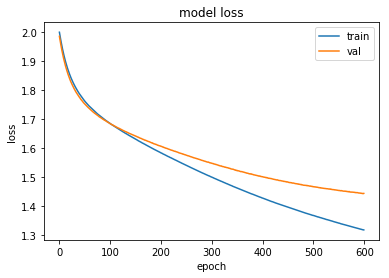

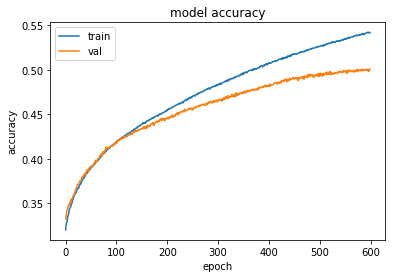

In [290]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [291]:
'''
--------One layer--------
Test loss: 1.7369774152755737
Test accuracy: 0.3934
--------Two layers-------
Test loss: 1.452355881881714
Test accuracy: 0.4857
'''
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 71us/step
Test loss: 1.452355881881714
Test accuracy: 0.4857
